In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 10)

In [2]:
oszlopnevek = ['read_date', 'read_time', 'event', 'country', 'user_id', 'source', 'topic']
read = pd.read_csv('/home/kriszta/DILAN/read.csv', delimiter = ';', header = None, names=oszlopnevek)

,read_date,read_time,event,country,user_id,source,topic
0,2018-01-01,00:01:01,read,country_7,2458151261,SEO,North_America
1,2018-01-01,00:03:20,read,country_7,2458151262,SEO,South_America
2,2018-01-01,00:04:01,read,country_7,2458151263,AdWords,Africa
3,2018-01-01,00:04:02,read,country_7,2458151264,AdWords,Europe
4,2018-01-01,00:05:03,read,country_8,2458151265,Reddit,North_America
...,...,...,...,...,...,...,...
581872,2018-03-31,04:34:32,read,country_4,2458361163,NaN,Africa
581873,2018-03-31,05:02:06,read,country_6,2458361177,NaN,Asia
581874,2018-03-31,05:02:14,read,country_7,2458361244,NaN,North_America
581875,2018-03-31,05:03:53,read,country_7,2458361267,NaN,Europe


In [3]:
read['read_date'] = pd.to_datetime(read['read_date'])
read = read[(read['read_date'] < '2018-03-31')]
read = read[['user_id','read_date']].groupby('read_date').count()

In [4]:
read_list = read['user_id'].tolist()
print(read_list)

[1867, 1896, 2013, 2276, 2285, 2398, 2379, 2505, 2896, 2999, 2790, 2555, 2565, 3442, 2872, 3281, 2867, 2668, 4063, 4289, 3089, 2933, 2980, 4565, 4027, 4218, 4416, 4837, 5601, 4669, 3692, 4588, 5996, 5333, 6642, 5411, 6851, 4392, 6756, 4658, 4158, 7861, 6360, 5730, 4347, 6287, 6628, 6367, 4679, 6770, 6832, 9470, 8475, 5668, 9958, 10911, 7629, 10247, 10653, 10235, 11103, 8872, 10660, 11956, 9770, 6316, 7863, 8140, 12251, 7479, 9304, 7030, 5617, 10086, 10422, 7141, 6312, 5892, 6882, 13677, 11751, 13579, 14148, 11644, 7988, 14659, 11790, 11180, 8408]


In [5]:
x = range(89)
y = read_list

In [6]:
coefs = np.polyfit(x, y, 4)
predict = np.poly1d(coefs)

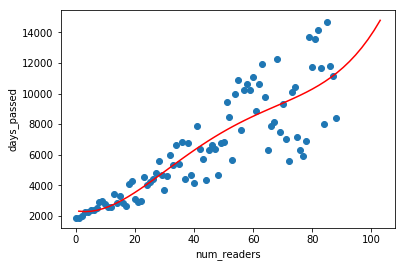

In [8]:
x_test = np.linspace(1, 89+14)
y_pred = predict(x_test[:, None])
plt.scatter(x, y)
plt.plot(x_test, y_pred, c = 'r')
plt.xlabel('num_readers')
plt.ylabel('days_passed')
plt.show()

In [9]:
from sklearn.metrics import r2_score
r2_score(y, predict(x))

0.7403142527974306

In [11]:
for i in range(90,105):
    print(i, int(predict(i)))

90 11628
91 11801
92 11984
93 12177
94 12380
95 12595
96 12821
97 13060
98 13312
99 13577
100 13857
101 14152
102 14463
103 14790
104 15134
